Baseline Model:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.00      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/Users/marcelcioca/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/marcelcioca/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/marcelcioca/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

KNN ohne SMOTE:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.09      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.53      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

KNN mit SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.63      0.77    114704
           1       0.04      0.41      0.07      4339

    accuracy                           0.63    119043
   macro avg       0.50      0.52      0.42    119043
weighted avg       0.93      0.63      0.74    119043



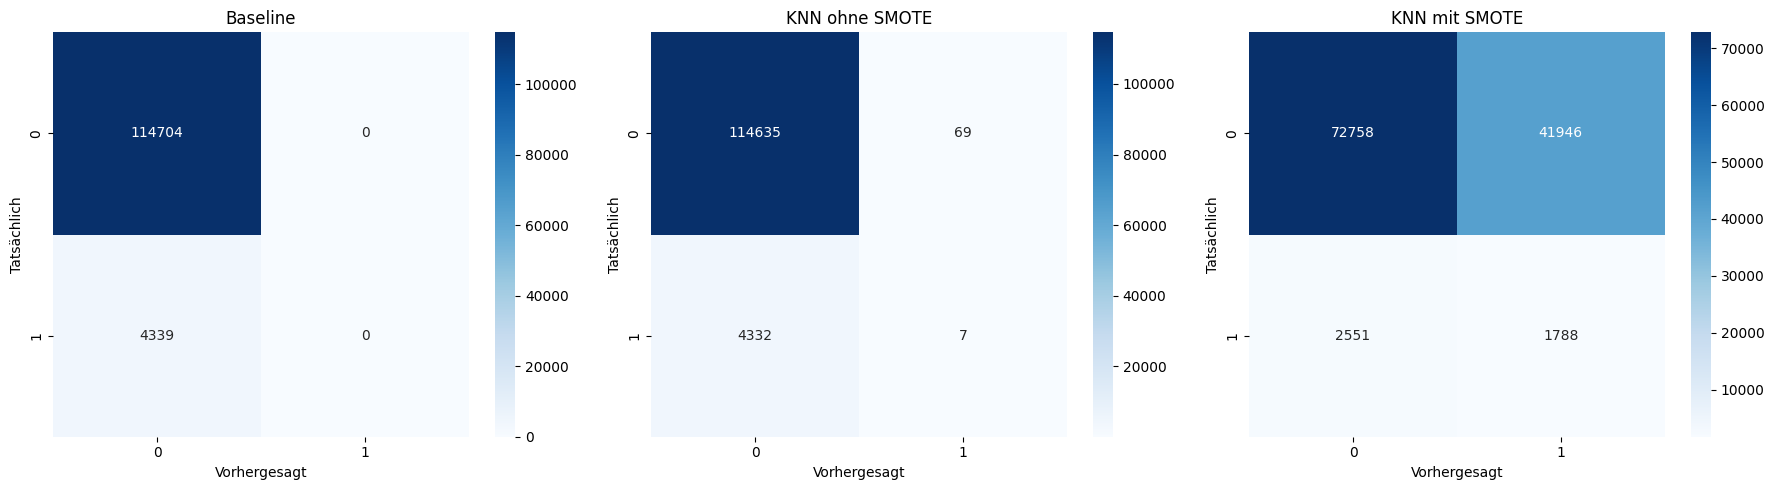

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Daten laden
train = pd.read_csv("../data/train.csv")
X = train.drop(columns=["target", "id"])
y = train["target"]

# 2. Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 3. Baseline Model
# -----------------------------
most_frequent_class = y_train.mode()[0]
y_pred_baseline = [most_frequent_class] * len(y_test)
print("Baseline Model:")
print(classification_report(y_test, y_pred_baseline))

# -----------------------------
# 4. KNN ohne SMOTE
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN ohne SMOTE:")
print(classification_report(y_test, y_pred_knn))

# -----------------------------
# 5. KNN mit SMOTE
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res_scaled = scaler.fit_transform(X_train_res)  # neu skalieren
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_res_scaled, y_train_res)
y_pred_knn_smote = knn_smote.predict(X_test_scaled)

print("KNN mit SMOTE:")
print(classification_report(y_test, y_pred_knn_smote))

# -----------------------------
# 6. Confusion Matrices plotten
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Baseline
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt="d", ax=axes[0], cmap="Blues")
axes[0].set_title("Baseline")
axes[0].set_xlabel("Vorhergesagt")
axes[0].set_ylabel("Tatsächlich")

# KNN ohne SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", ax=axes[1], cmap="Blues")
axes[1].set_title("KNN ohne SMOTE")
axes[1].set_xlabel("Vorhergesagt")
axes[1].set_ylabel("Tatsächlich")

# KNN mit SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_knn_smote), annot=True, fmt="d", ax=axes[2], cmap="Blues")
axes[2].set_title("KNN mit SMOTE")
axes[2].set_xlabel("Vorhergesagt")
axes[2].set_ylabel("Tatsächlich")

plt.tight_layout()
plt.show()
